In [1]:
import tqdm
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import svm
import matplotlib.pyplot as plt

%matplotlib inline

In [71]:
TR_PREPROC_PATH = "../data/tr_preprocessed.csv"
NOT_TR_PREPROC_PATH = "../data/not_tr_preprocessed.csv"

USE_BINARY_CLASSIFICATION = True

In [3]:
df_translated = pd.read_csv(TR_PREPROC_PATH)
df_not_translated = pd.read_csv(NOT_TR_PREPROC_PATH)

### Check standard deviations to check whether we have features with zero std.

In [6]:
df_translated[1:].std()

page_age_days                        1444.382810
revisions_count_mean                   51.998037
revisions_count_std                     0.129423
revisions_count_ar                      0.238511
revisions_count_max                     0.462799
revisions_count_min                    51.959503
revisions_count_range                  52.118006
revisions_count_avg_last_week          52.013177
revisions_count_avg_last_month         52.001505
revisions_count_avg_all_period         51.998037
contributors_count_mean                13.010091
contributors_count_std                  0.121856
contributors_count_ar                   0.242159
contributors_count_max                  0.308941
contributors_count_min                 12.927784
contributors_count_range               13.104263
contributors_count_avg_last_week       13.036392
contributors_count_avg_last_month      13.019272
contributors_count_avg_all_period      13.010091
translated                              0.000000
dtype: float64

In [7]:
df_not_translated[1:].std()

page_age_days                        553.545352
revisions_count_mean                   7.111243
revisions_count_std                    0.000000
revisions_count_ar                     0.000000
revisions_count_max                    0.000000
revisions_count_min                    7.111243
revisions_count_range                  7.111243
revisions_count_avg_last_week          7.111243
revisions_count_avg_last_month         7.111243
revisions_count_avg_all_period         7.111243
contributors_count_mean                2.970514
contributors_count_std                 0.000000
contributors_count_ar                  0.000000
contributors_count_max                 0.000000
contributors_count_min                 2.970514
contributors_count_range               2.970514
contributors_count_avg_last_week       2.970514
contributors_count_avg_last_month      2.970514
contributors_count_avg_all_period      2.970514
translated                             0.000000
dtype: float64

### Correlational maps

In [84]:
df_tr_numeric_only = df_translated.drop(['page_name'], axis = 1)
df_not_tr_numeric_only = df_not_translated.drop(['page_name'], axis = 1)

In [89]:
corr_map = df_tr_numeric_only.drop(['translated'], axis = 1).corr()

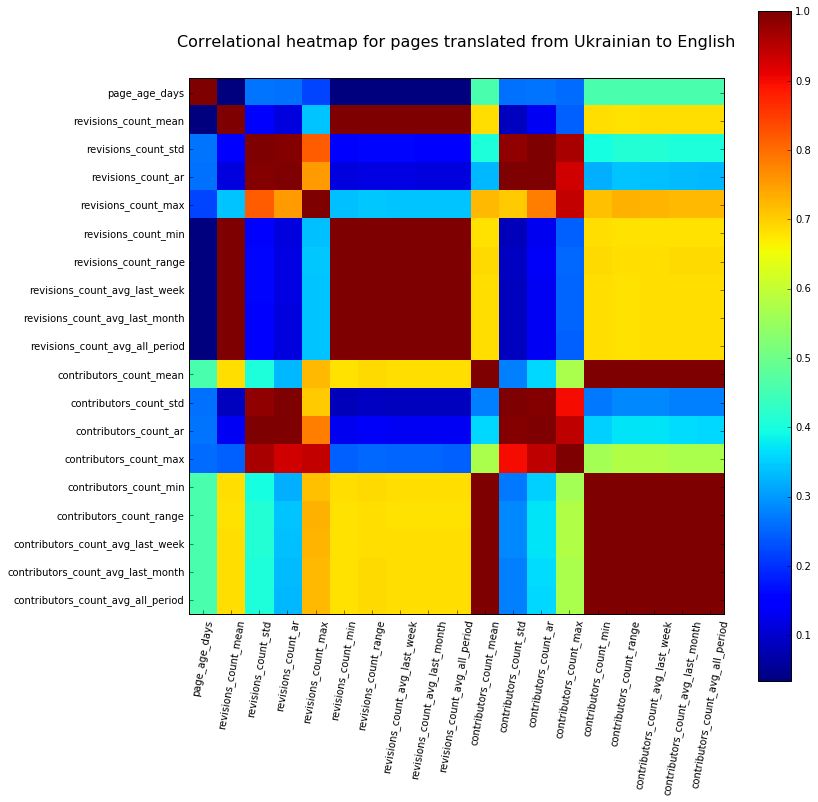

In [90]:
import matplotlib.ticker as plticker

loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals

labels = list(corr_map.columns)
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_map)
fig.colorbar(cax)

ax.set_xticklabels(['']+labels)
ax.set_yticklabels(['']+labels)
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_major_locator(loc)

plt.xticks(rotation = 80,)
plt.title("Correlational heatmap for pages translated from Ukrainian to English", fontsize = 16)
plt.show()
# scatter_matrix(df_translated[1:9], alpha=0.2, figsize=(8, 8), diagonal='kde') #gives singular matrix error

In [91]:
corr_map

,page_age_days,revisions_count_mean,revisions_count_std,revisions_count_ar,revisions_count_max,revisions_count_min,revisions_count_range,revisions_count_avg_last_week,revisions_count_avg_last_month,revisions_count_avg_all_period,contributors_count_mean,contributors_count_std,contributors_count_ar,contributors_count_max,contributors_count_min,contributors_count_range,contributors_count_avg_last_week,contributors_count_avg_last_month,contributors_count_avg_all_period
page_age_days,1.000000,0.034734,0.266464,0.264192,0.222253,0.034072,0.035942,0.035449,0.034909,0.034734,0.458576,0.260909,0.265506,0.258850,0.458778,0.458700,0.460328,0.458945,0.458576
revisions_count_mean,0.034734,1.000000,0.156017,0.115854,0.341334,0.999997,0.999983,0.999996,1.000000,1.000000,0.684045,0.087462,0.132848,0.249135,0.685555,0.682199,0.683079,0.683777,0.684045
revisions_count_std,0.266464,0.156017,1.000000,0.994396,0.818173,0.153580,0.160377,0.158704,0.156676,0.156017,0.404158,0.984071,0.998104,0.964073,0.396644,0.413992,0.413489,0.406488,0.404158
revisions_count_ar,0.264192,0.115854,0.994396,1.000000,0.752804,0.113501,0.119839,0.118576,0.116522,0.115854,0.329937,0.997350,0.999018,0.930588,0.322367,0.339926,0.339692,0.332359,0.329937
revisions_count_max,0.222253,0.341334,0.818173,0.752804,1.000000,0.338960,0.346807,0.343257,0.341800,0.341334,0.722032,0.702924,0.781234,0.941513,0.716414,0.728932,0.727074,0.723362,0.722032
revisions_count_min,0.034072,0.999997,0.153580,0.113501,0.338960,1.000000,0.999965,0.999986,0.999995,0.999997,0.682884,0.085182,0.130456,0.246610,0.684413,0.681013,0.681898,0.682611,0.682884
revisions_count_range,0.035942,0.999983,0.160377,0.119839,0.346807,0.999965,1.000000,0.999990,0.999985,0.999983,0.687216,0.091163,0.136995,0.254218,0.688690,0.685412,0.686277,0.686955,0.687216
revisions_count_avg_last_week,0.035449,0.999996,0.158704,0.118576,0.343257,0.999986,0.999990,1.000000,0.999998,0.999996,0.684698,0.090191,0.135559,0.251598,0.686186,0.682880,0.683760,0.684436,0.684698
revisions_count_avg_last_month,0.034909,1.000000,0.156676,0.116522,0.341800,0.999995,0.999985,0.999998,1.000000,1.000000,0.684201,0.088133,0.133513,0.249736,0.685705,0.682361,0.683242,0.683934,0.684201
revisions_count_avg_all_period,0.034734,1.000000,0.156017,0.115854,0.341334,0.999997,0.999983,0.999996,1.000000,1.000000,0.684045,0.087462,0.132848,0.249135,0.685555,0.682199,0.683079,0.683777,0.684045


In [92]:
# exclude page_name
df_tr_array = np.array(df_tr_numeric_only)
df_not_tr_array = np.array(df_not_tr_numeric_only)

### Create train and test data sets

In [101]:
train_ratio = 0.8
np.random.seed(42)

if USE_BINARY_CLASSIFICATION:

    total_dataset_size = df_tr_array.shape[0] + df_not_tr_array.shape[0]
    train_size = int(train_ratio * total_dataset_size)
    test_size = int((1-train_ratio)*total_dataset_size)+1
    
    train = np.vstack((df_tr_array[:train_size//2,:], df_not_tr_array[:train_size//2,:]))
    np.random.shuffle(train)
    X_train = train[:,:-1]
    y_train = train[:,-1]
    
    test = np.vstack((df_tr_array[train_size//2:,:], df_not_tr_array[train_size//2:,:]))
    np.random.shuffle(test)  
    X_test = test[:,:-1]
    y_test = test[:,-1]

    print("Test X dataset shape: {0}\nTrain X dataset shape: {1}".format(X_train.shape, X_test.shape))
    print("Test Y dataset shape: {0}\nTrain Y dataset shape: {1}".format(y_train.shape, y_test.shape))
    
else:
    # for one clas classification case
    train_size = int(train_ratio * df_tr_array.shape[0])
    test_size = int((1-train_ratio)*df_tr_array.shape[0])+1

    X_train = df_tr_array[:train_size,:-1]
    X_test = df_tr_array[train_size:,:-1]
    X_outliers = df_not_tr_array[:test_size,:-1]
    print("Test dataset shape: {0}\nTrain dataset shape: {1}\nOutliers dataset shape: {2}".
          format(X_train.shape, X_test.shape, X_outliers.shape))

Test X dataset shape: (160, 19)
Train X dataset shape: (40, 19)
Test Y dataset shape: (160,)
Train Y dataset shape: (40,)


In [93]:
def apply_one_class_classifier():
    # source: http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html 

    # fit the model
    clf = svm.OneClassSVM(nu=0.2, random_state=42)
    clf.fit(X_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    y_pred_outliers = clf.predict(X_outliers)

    n_error_train = y_pred_train[y_pred_train == -1].size
    n_error_test = y_pred_test[y_pred_test == -1].size
    n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

    train_accuracy = 1 - n_error_train/y_pred_train.size
    translated_test_accuracy = 1 - n_error_test/test_size
    full_test_accuracy = 1 - (n_error_test+n_error_outliers)/(test_size*2)

    print("Train acc: ",train_accuracy)
    print("Test accuracy on translated: ", translated_test_accuracy)
    print("Full test accuracy: ", full_test_accuracy)
    
    print("predicted classes of test translated:")
    display(y_pred_test)
    print("predicted classes of test non translated:")
    display(y_pred_outliers)

In [109]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


def apply_binary_classifier():
    model = XGBClassifier()
    model.fit(X_train, y_train)
    print("Model:\n{}\n".format(model))
    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [1 if value>=0.5 else 0 for value in y_pred]
    # evaluate predictions
    print(classification_report(y_test, predictions))
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [110]:
if USE_BINARY_CLASSIFICATION:
    apply_binary_classifier()
else:
    apply_one_class_classifier()

Model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

             precision    recall  f1-score   support

        0.0       0.71      1.00      0.83        20
        1.0       1.00      0.60      0.75        20

avg / total       0.86      0.80      0.79        40

Accuracy: 80.00%
